# Maskinlæring kalvelykke kalv masteroppgave 2021

## Knut-Henning Kofoed | Februar 2021

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Hele datasettet

Datasettet inneholder 4 aktivitets klasser: Hviler = 0, Bevegelse = 1, Beiter = 2, Dier = 3

#### Utforske data

In [2]:
# Innlasting av data
df = pd.read_csv('aks_atf_KOBLET.csv', header=0)
print('Shape of data: {}'.format(df.shape))
df.head(5)

Shape of data: (102656, 13)


,serial,date,header_date,index,x,y,z,xcal,ycal,zcal,norm,kalv,aktivitet
0,35396,2020-08-23 14:41:08.412000,2020-08-23 14:40:17,0,2304,15872,-512,0.144,0.992,-0.032,1.002908,True,0
1,35396,2020-08-23 14:41:08.412000,2020-08-23 14:40:17,1,4608,17152,1280,0.288,1.072,0.080,1.112892,True,0
2,35396,2020-08-23 14:41:08.412000,2020-08-23 14:40:17,2,768,14336,1024,0.048,0.896,0.064,0.899564,True,0
3,35396,2020-08-23 14:41:08.412000,2020-08-23 14:40:17,3,2304,16384,-768,0.144,1.024,-0.048,1.035189,True,0
4,35396,2020-08-23 14:41:08.412000,2020-08-23 14:40:17,4,2048,15360,-768,0.128,0.960,-0.048,0.969684,True,0


In [3]:
df.describe()

,serial,index,x,y,z,xcal,ycal,zcal,norm,aktivitet
count,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.00000
mean,36344.502494,15.500000,1126.024938,15203.077307,-4005.723192,0.070377,0.950192,-0.250358,1.037524,1.50717
std,985.291527,9.233138,2228.985381,2579.854334,4576.955594,0.139312,0.161241,0.286060,0.145866,1.05312
min,35396.000000,0.000000,-32768.000000,-32768.000000,-32768.000000,-2.048000,-2.048000,-2.048000,0.053066,0.00000
25%,35396.000000,7.750000,0.000000,14080.000000,-6656.000000,0.000000,0.880000,-0.416000,0.980449,0.00000
50%,35396.000000,15.500000,1024.000000,15616.000000,-3328.000000,0.064000,0.976000,-0.208000,1.018108,2.00000
75%,37368.000000,23.250000,2304.000000,16384.000000,-768.000000,0.144000,1.024000,-0.048000,1.075457,2.00000
max,37368.000000,31.000000,32512.000000,32512.000000,32000.000000,2.032000,2.032000,2.000000,3.538027,3.00000


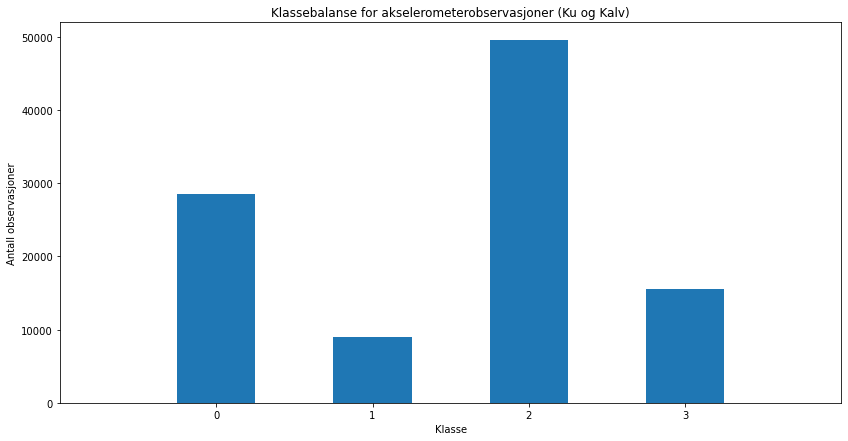

In [4]:
# Klassebalanse for aktivitet (Ku og Kalv)
data = df['aktivitet']
counts = np.bincount(data)
n_classes = len(counts)

fig, ax = plt.subplots(figsize=(14,7))
ax.bar(range(n_classes), counts, width=0.5, align='center')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set_xlabel('Klasse')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Klassebalanse for akselerometerobservasjoner (Ku og Kalv)')

plt.show()

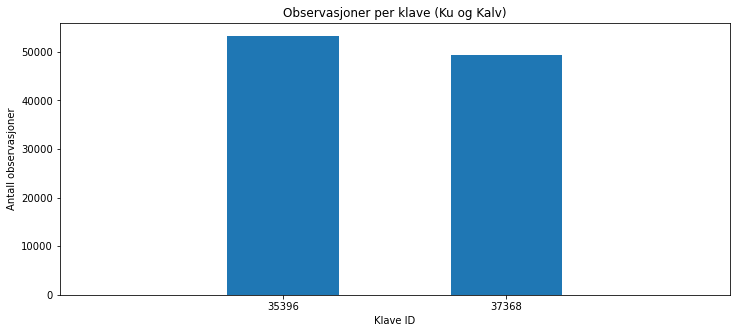

In [5]:
# Observasjoner pr klave (Ku og Kalv)
df_counts = df['serial'].value_counts()
num_coll = len(df_counts) # Antall klaver i settet

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(range(num_coll), df_counts, width=0.5, align='center')
ax.set(xticks=range(num_coll), xlim=[-1, num_coll])
ax.set_xticklabels(df_counts.index)
ax.set_xlabel('Klave ID')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Observasjoner per klave (Ku og Kalv)')

plt.show()

### Kalv

#### Utforske data

In [6]:
df_kalv = df.loc[df['kalv'] == True]
print('Shape of data: {}'.format(df_kalv.shape))

Shape of data: (102656, 13)


In [7]:
df_kalv.describe()

,serial,index,x,y,z,xcal,ycal,zcal,norm,aktivitet
count,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.000000,102656.00000
mean,36344.502494,15.500000,1126.024938,15203.077307,-4005.723192,0.070377,0.950192,-0.250358,1.037524,1.50717
std,985.291527,9.233138,2228.985381,2579.854334,4576.955594,0.139312,0.161241,0.286060,0.145866,1.05312
min,35396.000000,0.000000,-32768.000000,-32768.000000,-32768.000000,-2.048000,-2.048000,-2.048000,0.053066,0.00000
25%,35396.000000,7.750000,0.000000,14080.000000,-6656.000000,0.000000,0.880000,-0.416000,0.980449,0.00000
50%,35396.000000,15.500000,1024.000000,15616.000000,-3328.000000,0.064000,0.976000,-0.208000,1.018108,2.00000
75%,37368.000000,23.250000,2304.000000,16384.000000,-768.000000,0.144000,1.024000,-0.048000,1.075457,2.00000
max,37368.000000,31.000000,32512.000000,32512.000000,32000.000000,2.032000,2.032000,2.000000,3.538027,3.00000


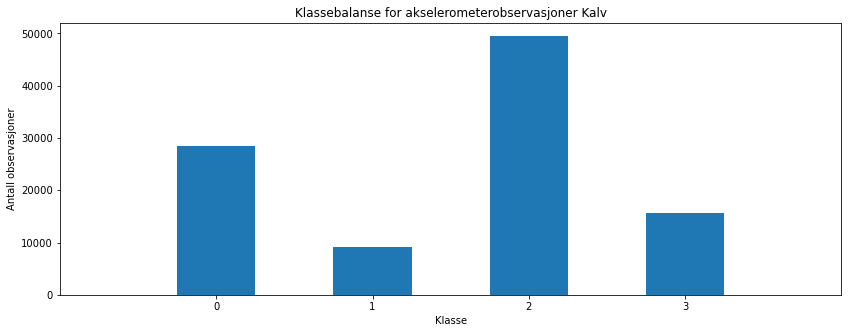

In [8]:
# Klassebalanse for aktivitet (Kalv)
data = df_kalv['aktivitet']
counts = np.bincount(data)
n_classes = len(counts)

fig, ax = plt.subplots(figsize=(14,5))
ax.bar(range(n_classes), counts, width=0.5, align='center')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set_xlabel('Klasse')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Klassebalanse for akselerometerobservasjoner Kalv')

plt.show()

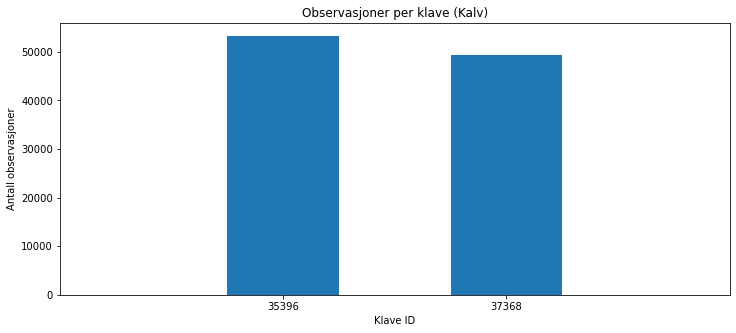

In [9]:
# Observasjoner pr klave (Kalv)
df_counts = df_kalv['serial'].value_counts()
num_coll = len(df_counts) # Antall klaver i settet

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(range(num_coll), df_counts, width=0.5, align='center')
ax.set(xticks=range(num_coll), xlim=[-1, num_coll])
ax.set_xticklabels(df_counts.index)
ax.set_xlabel('Klave ID')
ax.set_ylabel('Antall observasjoner')
ax.set_title('Observasjoner per klave (Kalv)')

plt.show()

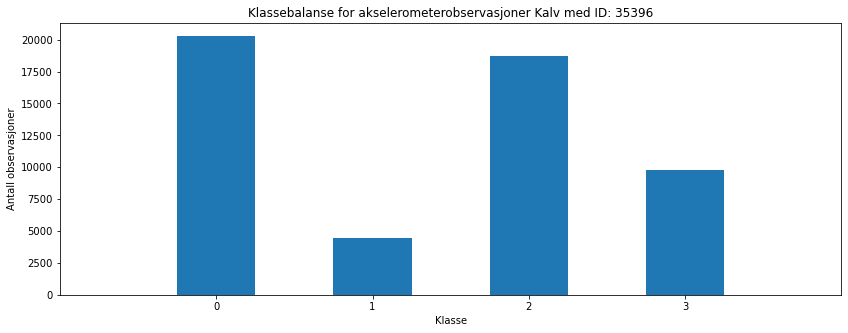

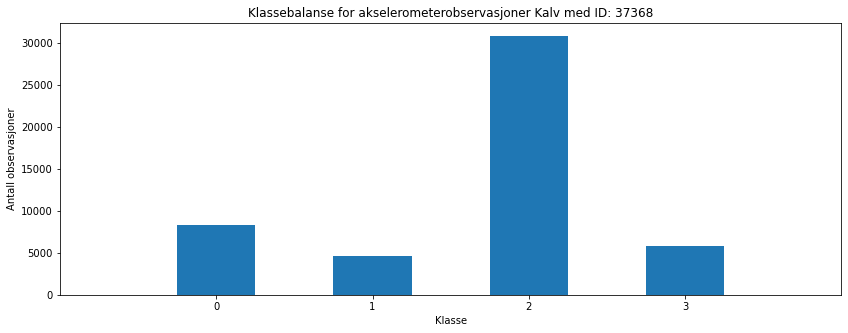

In [10]:
# Klassebalanse for for hver klave (Kalv)
serials = list(df_kalv['serial'].unique())

for serial in serials:
    data = df_kalv['aktivitet'][df_kalv['serial'] == serial] 
    counts = np.bincount(data)
    n_classes = len(counts)

    fig, ax = plt.subplots(figsize=(14,5))
    ax.bar(range(n_classes), counts, width=0.5, align='center')
    ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
    ax.set_xlabel('Klasse')
    ax.set_ylabel('Antall observasjoner')
    ax.set_title('Klassebalanse for akselerometerobservasjoner Kalv med ID: {}'.format(serial))

    plt.show()

#### Maskinlæring

Import

In [11]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from scipy import stats

Dataklargjøring:

In [12]:
# Oppdeling
# data = df_kalv[df_kalv['serial'] == serials[0]]
# data['date'] = pd.to_datetime(data['date'])
# data['aktivitet'].replace({1: 0, 2: 0, 3: 1}, inplace=True)

# attributes = ['xcal', 'ycal', 'zcal']
# df_train = data[(data['date'] > datetime.strptime('2020-08-23 16:53:23', '%Y-%m-%d %H:%M:%S'))
#                 & (data['date'] <= datetime.strptime('2020-08-23 17:33:23', '%Y-%m-%d %H:%M:%S'))]
# df_test = data[(data['date'] > datetime.strptime('2020-08-23 17:34:04', '%Y-%m-%d %H:%M:%S'))
#                & (data['date'] <= datetime.strptime('2020-08-23 17:38:58', '%Y-%m-%d %H:%M:%S'))]

In [13]:
attributes = ['xcal', 'ycal', 'zcal']
#df_kalv['aktivitet'].replace({2: 1, 3: 2}, inplace=True)

df_train = df_kalv[(df_kalv['serial'] == 35396)]
df_test = df_kalv[df_kalv['serial'] == 37368]
df_test = df_test.tail(25000)

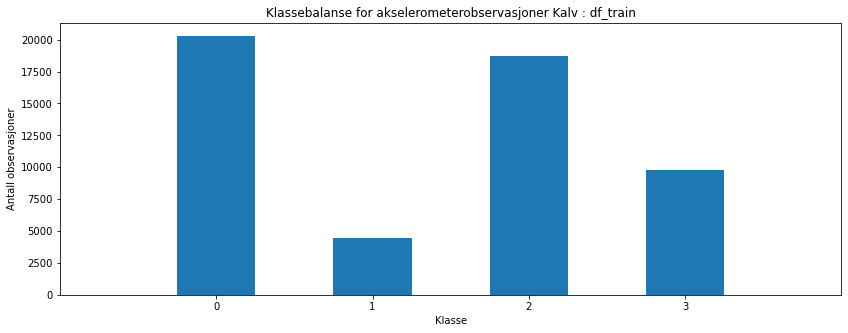

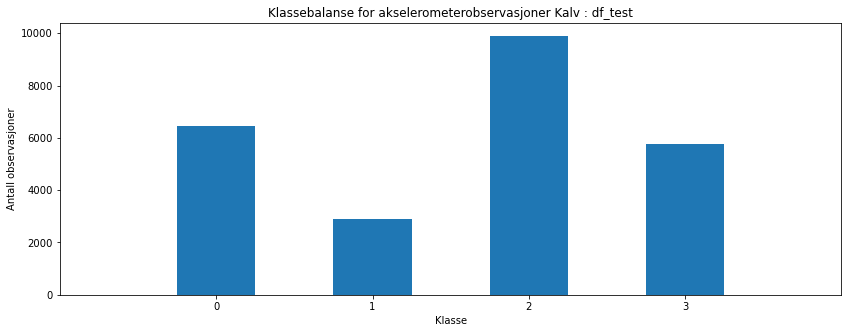

In [14]:
# Klassebalanse for for hver oppdeling (Kalv)
df_list_names = ['df_train', 'df_test']
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    data = df['aktivitet']
    counts = np.bincount(data)
    n_classes = len(counts)

    fig, ax = plt.subplots(figsize=(14,5))
    ax.bar(range(n_classes), counts, width=0.5, align='center')
    ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
    ax.set_xlabel('Klasse')
    ax.set_ylabel('Antall observasjoner')
    ax.set_title('Klassebalanse for akselerometerobservasjoner Kalv : {}'.format(df_list_names[i]))

    plt.show()

In [15]:
input_train = df_train[attributes]
y_train = df_train['aktivitet']

input_test = df_test[attributes]
y_test = df_test['aktivitet']

In [16]:
scale_columns = attributes

scaler = StandardScaler()

scaler = scaler.fit(input_train[scale_columns])

input_train.loc[:, scale_columns] = scaler.transform(input_train[scale_columns].to_numpy())
input_test.loc[:, scale_columns] = scaler.transform(input_test[scale_columns].to_numpy())

C:\Users\Knut-henning\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Knut-henning\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\Knut-henning\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [17]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [18]:
print('Train data shape: {}{}'.format(input_train.shape, y_train.shape))
print('Test data shape: {}{}'.format(input_test.shape, y_test.shape))

Train data shape: (53280, 3)(53280,)
Test data shape: (25000, 3)(25000,)


In [19]:
TIME_STEPS = 64
STEP = 31

input_train, y_train = create_dataset(
    input_train[attributes],
    y_train,
    TIME_STEPS,
    STEP
)

input_test, y_test = create_dataset(
    input_test[attributes],
    y_test,
    TIME_STEPS,
    STEP
)

In [20]:
print(input_train.shape, y_train.shape)

(1717, 64, 3) (1717, 1)


In [21]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [22]:
print(input_train.shape, y_train.shape)

(1717, 64, 3) (1717, 4)


GRU:

In [23]:
model = keras.Sequential()
model.add(
    tf.keras.layers.Conv1D(
        filters=50, 
        kernel_size=3,
        activation='relu',
        input_shape=[input_train.shape[1], input_train.shape[2]]
    )
)
model.add(tf.keras.layers.MaxPooling1D(pool_size=4, padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(
    tf.keras.layers.Conv1D(
        filters=50, 
        kernel_size=3,
        activation='relu'
    )
)
model.add(tf.keras.layers.MaxPooling1D(pool_size=2, padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(
    tf.keras.layers.GRU(
        units=64,
        activation='tanh',
        recurrent_activation='sigmoid',
        use_bias=True,
        kernel_initializer='glorot_uniform',
        return_sequences=True,  # neste lag er også GRU
        dropout=0.0,
        recurrent_dropout=0.2
    )
)
model.add(
    tf.keras.layers.GRU(
        units=64,
        activation='tanh',
        recurrent_activation='sigmoid',
        use_bias=True,
        kernel_initializer='glorot_uniform',
        return_sequences=False,  # neste lag er Dense
        dropout=0.2,
        recurrent_dropout=0.2
    )
)

model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [24]:
history = model.fit(
    input_train, y_train,
    epochs=14,
    batch_size=128,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/14
13/13 [==============================] - 1s 94ms/step - loss: 1.4311 - acc: 0.3553 - val_loss: 1.1857 - val_acc: 0.7849
Epoch 2/14
13/13 [==============================] - 1s 55ms/step - loss: 1.2546 - acc: 0.5010 - val_loss: 1.1990 - val_acc: 0.7733
Epoch 3/14
13/13 [==============================] - 1s 53ms/step - loss: 1.2158 - acc: 0.4926 - val_loss: 1.1063 - val_acc: 0.7791
Epoch 4/14
13/13 [==============================] - 1s 53ms/step - loss: 1.1764 - acc: 0.5049 - val_loss: 1.0128 - val_acc: 0.7849
Epoch 5/14
13/13 [==============================] - 1s 54ms/step - loss: 1.1292 - acc: 0.5275 - val_loss: 0.9351 - val_acc: 0.7849
Epoch 6/14
13/13 [==============================] - 1s 54ms/step - loss: 1.0784 - acc: 0.5495 - val_loss: 0.8790 - val_acc: 0.7733
Epoch 7/14
13/13 [==============================] - 1s 56ms/step - loss: 1.0118 - acc: 0.5722 - val_loss: 0.8267 - val_acc: 0.7733
Epoch 8/14
13/13 [==============================] - 1s 53ms/step - loss: 0.9346 - a

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 62, 50)            500       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 50)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 50)            200       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 50)            7550      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 50)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 50)             200       
_________________________________________________________________
gru (GRU)                    (None, 6, 64)             2

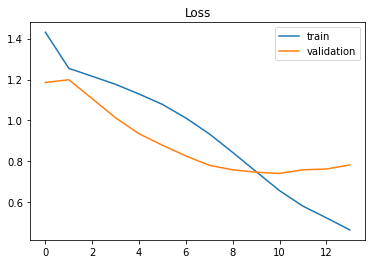

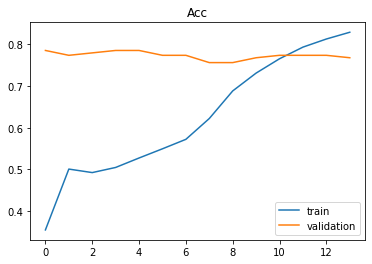

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend();
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Acc')
plt.legend();
plt.show()

In [27]:
model.evaluate(input_test, y_test)

26/26 [==============================] - 0s 7ms/step - loss: 1.2042 - acc: 0.6484


[1.2041655778884888, 0.6484472155570984]

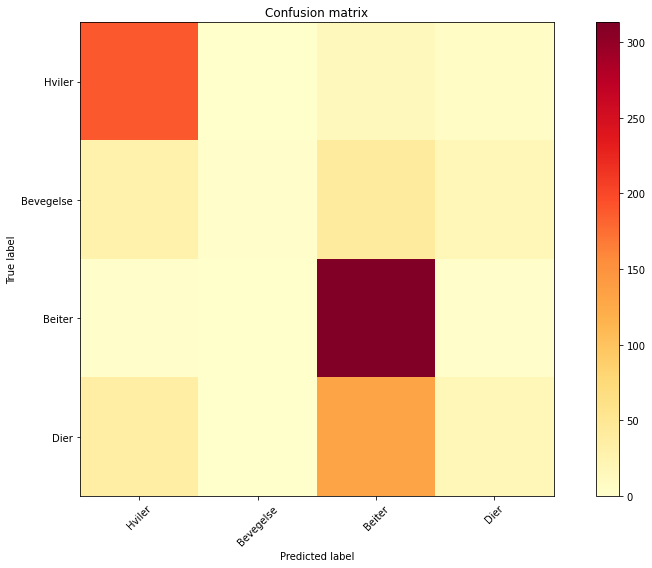

In [28]:
Y_test = np.argmax(y_test, axis=1) # Konverterer fra Onehot tilbake til klasse
y_pred = np.argmax(model.predict(input_test), axis=-1)
classes = ['Hviler', 'Bevegelse', 'Beiter', 'Dier']

plt.figure(figsize=(12,8))
plt.imshow(confusion_matrix(Y_test, y_pred), interpolation='nearest', cmap='YlOrRd')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout();

LSTM:

In [35]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            dropout=0.2,
            units=128, 
            input_shape=[input_train.shape[1], input_train.shape[2]],
            return_sequences=True
        )
    )
)
model.add(
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            dropout=0.2,
            units=64,
            return_sequences=False
        )
    )
)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=9, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [36]:
history = model.fit(
    input_train, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/3
13/13 [==============================] - 1s 113ms/step - loss: 1.2971 - acc: 0.4906 - val_loss: 0.8564 - val_acc: 0.7558
Epoch 2/3
13/13 [==============================] - 1s 40ms/step - loss: 1.0709 - acc: 0.5560 - val_loss: 0.6531 - val_acc: 0.7616
Epoch 3/3
13/13 [==============================] - 1s 39ms/step - loss: 1.0360 - acc: 0.5605 - val_loss: 0.6588 - val_acc: 0.7616


In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 64, 256)           135168    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 1161      
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 40        
Total params: 300,721
Trainable params: 300,721
Non-trainable params: 0
________________________________________________

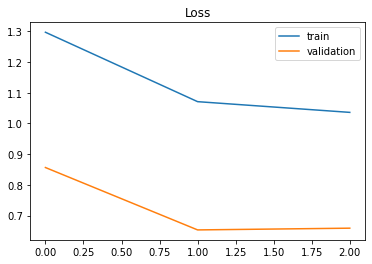

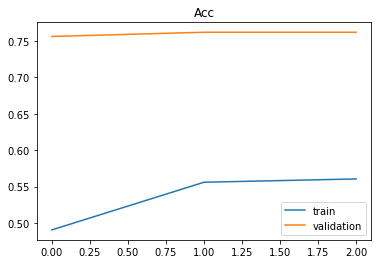

In [38]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend();
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Acc')
plt.legend();
plt.show()

In [39]:
model.evaluate(input_test, y_test)

26/26 [==============================] - 0s 12ms/step - loss: 1.1759 - acc: 0.6236


[1.1759334802627563, 0.6236025094985962]

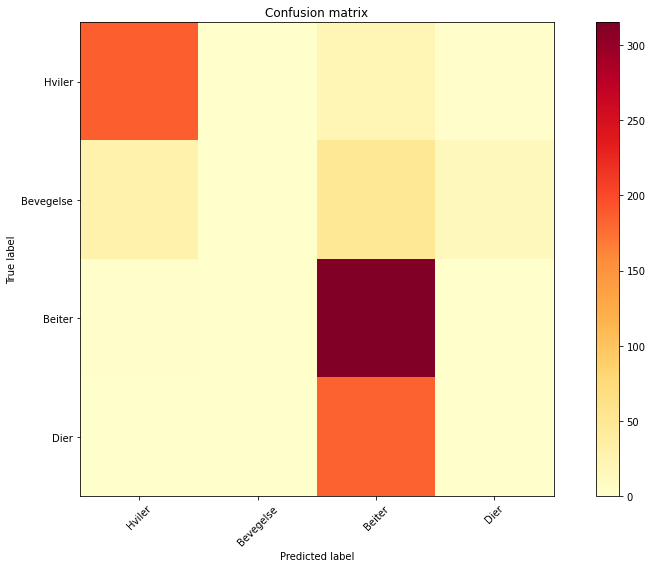

In [40]:
Y_test = np.argmax(y_test, axis=1) # Konverterer fra Onehot tilbake til klasse
y_pred = np.argmax(model.predict(input_test), axis=-1)
classes = ['Hviler', 'Bevegelse', 'Beiter', 'Dier']

plt.figure(figsize=(12,8))
plt.imshow(confusion_matrix(Y_test, y_pred), interpolation='nearest', cmap='YlOrRd')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout();